In [7]:
import pandas as pd

filepath1 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/titanic3.csv'
df = pd.read_csv(filepath1, index_col = 'pclass')
df

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN


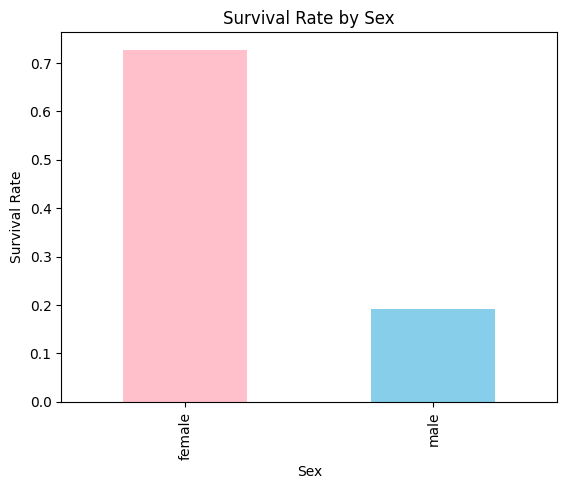

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Q. titanic3 데이터에서 성별과 생존율의 관계를 시각화 하세요.
survival_rate_by_sex = df.groupby('sex')['survived'].mean()
df['survival_rate_by_sex'] = df['sex'].map(survival_rate_by_sex)

survival_rate_by_sex.plot(kind='bar', color=['pink','skyblue'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

sex
male      0.190985
female    0.727468
Name: survived, dtype: float64 



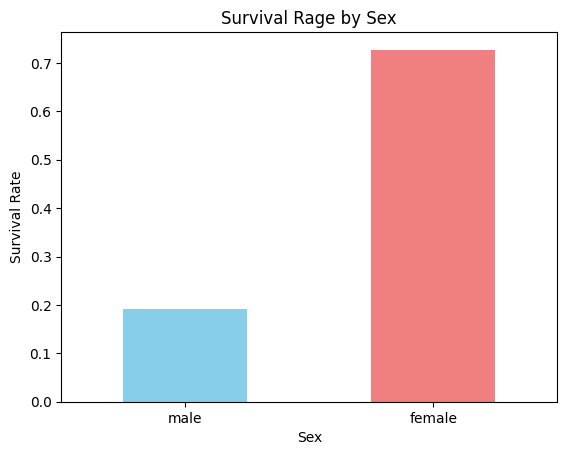

In [65]:
# teach
survival_by_sex = df.groupby('sex')['survived'].mean().sort_values()
print(survival_by_sex,'\n')

#시각화
survival_by_sex.plot(kind = 'bar', color=['skyblue', 'lightcoral'])
plt.title('Survival Rage by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 필요한 열 선택 및 전처리
features = ['pclass','sex','age','sibsp','parch','fare','embarked']
df = df[features + ['survived']]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별과 승객(생존,사망)수 관계 시각화
sns.countplot(x='sex', hue='survived', data = df)
plt.title('Survival Count by Sex')

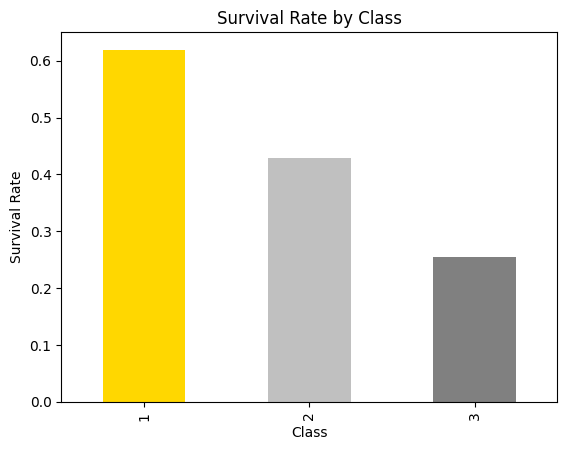

In [75]:
# Q. 승객 등급과 생존율 관계를 pandas를 이용하여 시각화 하세요.
survival_rate_by_class = df.groupby('pclass')['survived'].mean()

survival_rate_by_class.plot(kind='bar', color=['gold','silver','gray'])
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

pclass
3    0.255289
2    0.429603
1    0.619195
Name: survived, dtype: float64 



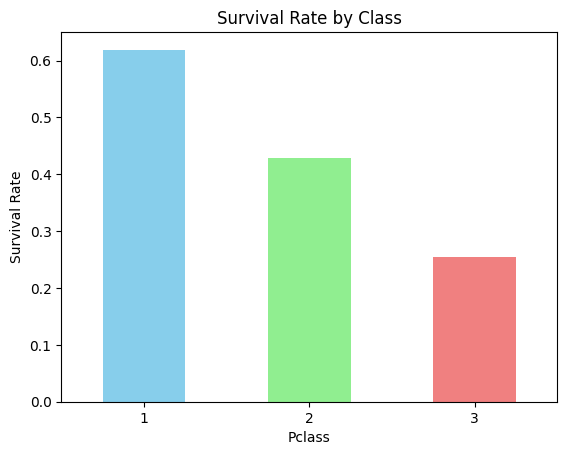

In [76]:
#teach
survival_by_class = df.groupby('pclass')['survived'].mean().sort_values()
print(survival_by_class,'\n')

#시각화
survival_rate_by_class.plot(kind='bar', color=['skyblue','lightgreen','lightcoral'])
plt.title('Survival Rate by Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

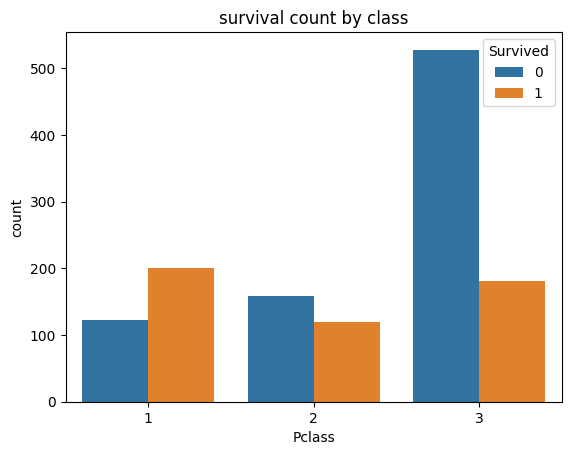

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='pclass', hue='survived', data=df)
plt.title('survival count by class')
plt.xlabel('Pclass')
plt.ylabel('count')
plt.legend(title='Survived')
plt.show()

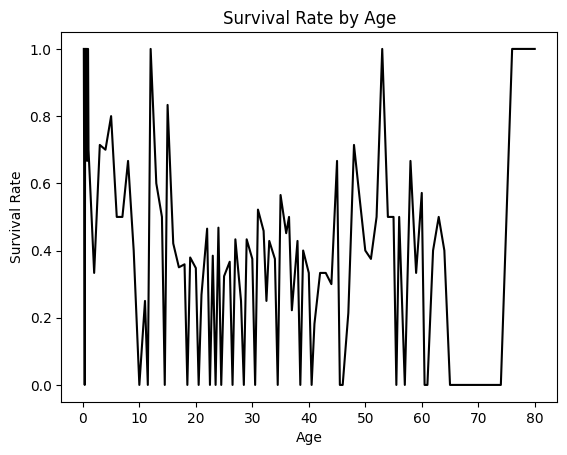

In [87]:
# Q. 나이와 생존율 관계를 시각화하여 출력하세요.
survival_rate_by_Age = df.groupby('age')['survived'].mean()

survival_rate_by_Age.plot(kind='line', color='black')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

age_group
(0, 10]      0.581395
(10, 20]     0.395062
(20, 30]     0.371191
(30, 40]     0.423810
(40, 50]     0.393939
(50, 60]     0.483871
(60, 70]     0.222222
(70, 80]     0.333333
(80, 90]          NaN
(90, 100]         NaN
Name: survived, dtype: float64 



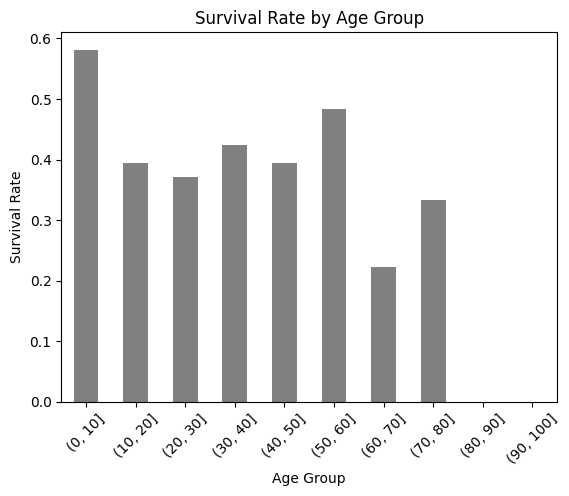

In [85]:
# 나이와 생존율 관계 계산을 위해 나이 그룹화
df['age_group'] = pd.cut(df['age'], bins = [0,10,20,30,40,50,60,70,80,90,100])

# 나이 그룹별 생존율 계산
survival_by_age = df.groupby('age_group')['survived'].mean()
print(survival_by_age,'\n')

#시각화
survival_by_age.plot(kind='bar', color='gray')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

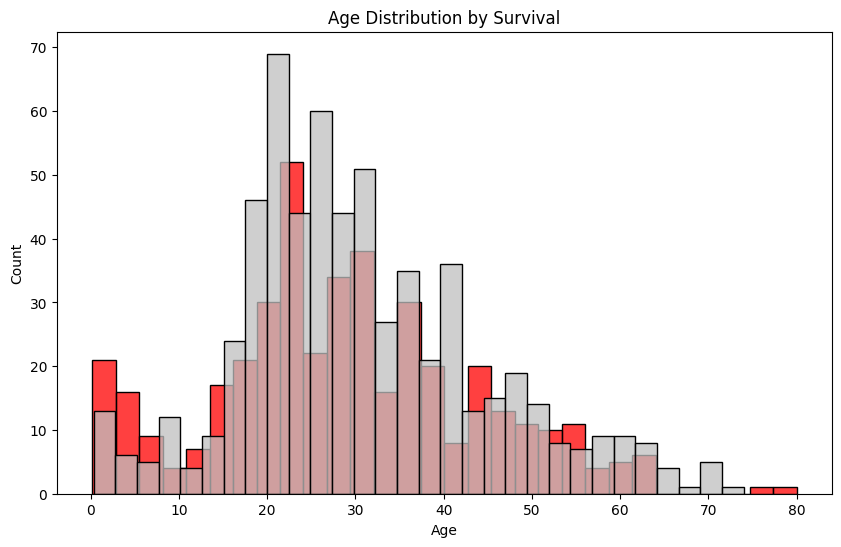

In [94]:
# 나이와 생존, 사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df['survived'] == 1]['age'], bins=30, kde=False, color = 'red', label='Survived')
sns.histplot(df[df['survived'] == 0]['age'], bins=30, kde=False, color = 'silver', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

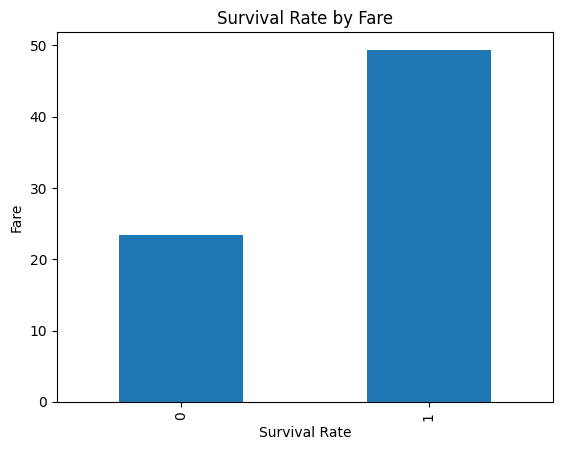

In [61]:
# Q. 요금과 생존율 관계를 Pandas를 이용해 시각화하여 출력하세요.
survival_rate_by_Fare = df.groupby('survived')['fare'].mean()

survival_rate_by_Fare.plot(kind='bar')
plt.title('Survival Rate by Fare')
plt.xlabel('Survival Rate')
plt.ylabel('Fare')
plt.show()

fare_group
(0, 50]       0.323501
(50, 100]     0.628205
(100, 150]    0.787879
(150, 200]    0.615385
(200, 250]    0.571429
(250, 300]    0.769231
(300, 350]         NaN
(350, 400]         NaN
(400, 450]         NaN
(450, 500]         NaN
Name: survived, dtype: float64 



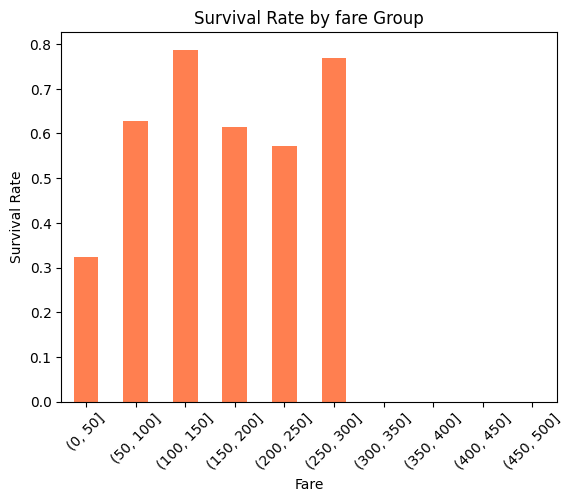

In [98]:
df['fare_group'] = pd.cut(df['fare'], bins = [0,50,100,150,200,250,300,350,400,450,500])

# 비용 그룹별 생존율 계산
survival_by_fare = df.groupby('fare_group')['survived'].mean()
print(survival_by_fare,'\n')

#시각화
survival_by_fare.plot(kind='bar', color='coral')
plt.title('Survival Rate by fare Group')
plt.xlabel('Fare')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

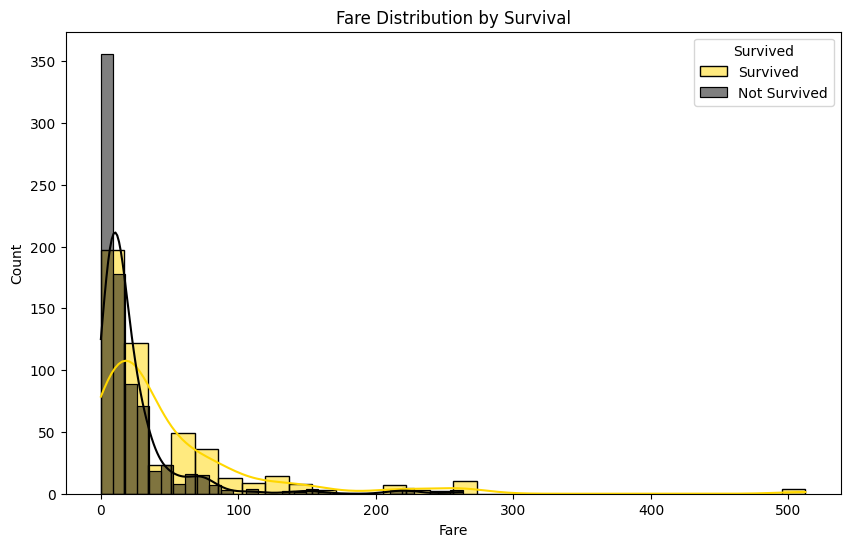

In [104]:
# 요금과 생존,사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df['survived'] == 1]['fare'], bins=30, kde=True, color = 'gold', label='Survived') # kde 분포선을 그려줌.
sns.histplot(df[df['survived'] == 0]['fare'], bins=30, kde=True, color = 'black', label='Not Survived')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()

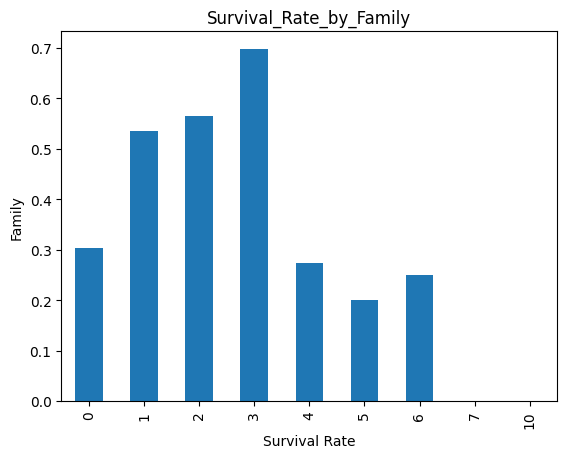

In [62]:
# Q. 가족 동반 여부와 생존율 관계를 시각화하여 출력하세요.
df['Family'] = df['sibsp'] + df['parch']
survival_rate_by_Family = df.groupby('Family')['survived'].mean()

survival_rate_by_Family.plot(kind='bar')
plt.title('Survival_Rate_by_Family')
plt.xlabel('Survival Rate')
plt.ylabel('Family')
plt.show()

with_family
0    0.302532
1    0.502890
Name: survived, dtype: float64 



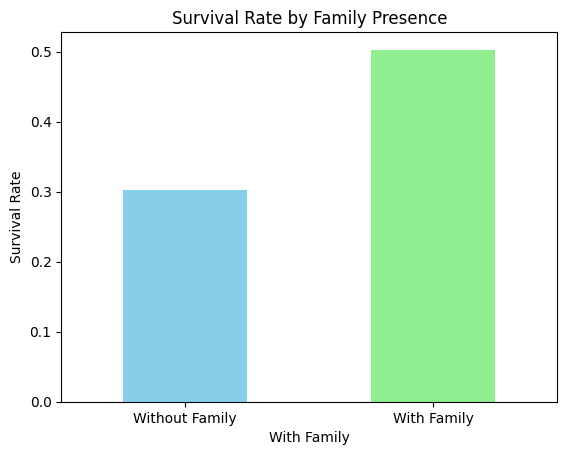

In [105]:
# 가족 동반 여부를 나타내는 파생 변수 생성
df['with_family'] = (df['sibsp'] + df['parch'] > 0).astype(int)

# 가족 동반 여부에 따른 생존율 계산
survival_by_family = df.groupby('with_family')['survived'].mean()
print(survival_by_family,'\n')

# 시각화
survival_by_family.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Family Presence')
plt.xlabel('With Family')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Without Family', 'With Family'], rotation=0)
plt.show()

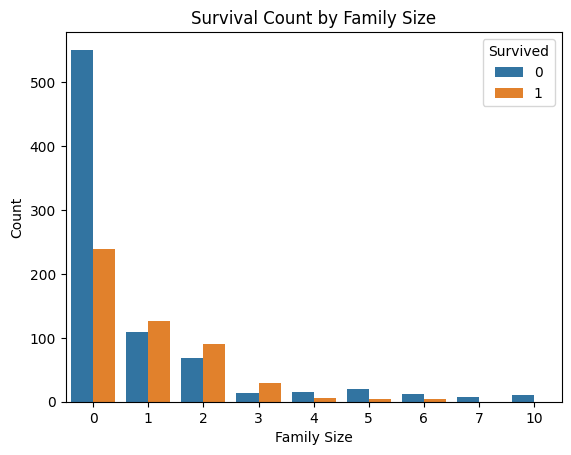

In [106]:
# 가족 동반 여부와 생존사망자수 관계 시각화
df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()